In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore') 

#importing the necessary libaries
import pandas as pd     #numerical computation
import numpy as np      #data manipulation and analysis
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns        #statistical data visualization
%matplotlib inline

In [2]:
#loading the data and reading it
iris=pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#basic info about datatype
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#summary of all statistics using describe()
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#total count of each species
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
#data preprocessing
#checking for null values
print("Missing values:\n")
(iris.isnull().sum())

Missing values:



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

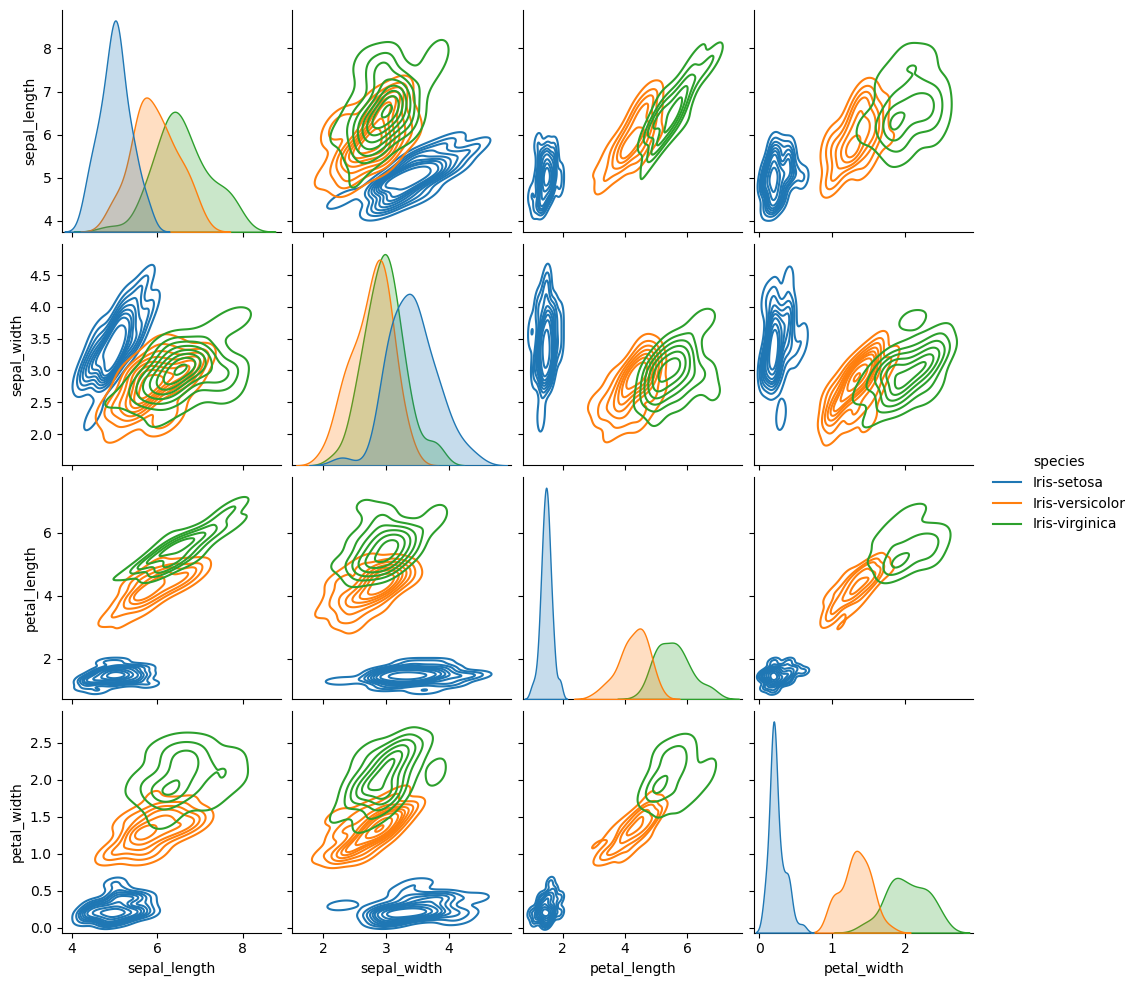

In [7]:
# Display pair plot to visualize relationships between features
sns.pairplot(iris,hue='species',kind='kde')

<Axes: >

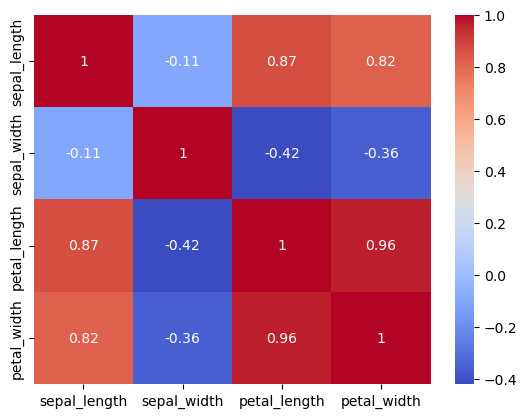

In [8]:
# correlation between features using heatmap
sns.heatmap(iris.corr(),cmap='coolwarm',annot=True)

<Axes: >

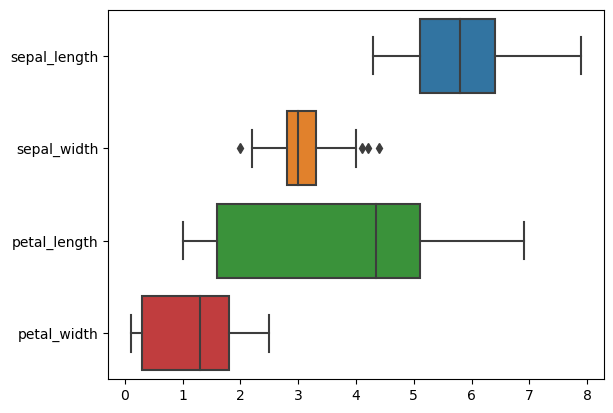

In [9]:
#checking outliers using boxplot
sns.boxplot(data=iris[['sepal_length','sepal_width','petal_length','petal_width']],orient='h')

In [10]:
#label encoder:converting lables into numeric forms(machine readable form)
from sklearn.preprocessing import LabelEncoder
iris_le = LabelEncoder()

In [11]:
iris['species']=iris_le.fit_transform(iris['species'])
iris
#here Iris-setosa=0,Iris-versicolor=1,Iris-virginica=2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
#assigning the variables
#x is sepal_length,sepal_width,petal_length,petal_width and y is species
x=iris.drop(['species'],axis=1)
y=iris['species']

In [13]:
#splitting the training and testing data
#30% is kept as test data set and remaining 70% is kept as train data set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size = 0.7,random_state=100)

In [14]:
#importing the logistic_regression model from the scikit-learn library
from sklearn.linear_model import LogisticRegression

#initialize the model
iris_model=LogisticRegression()

#fitting and training the model
iris_model.fit(x_train,y_train)

LogisticRegression()

In [15]:
#finding the coefficient
iris_model.coef_

array([[-0.39989068,  0.87874921, -2.28021926, -0.99799263],
       [ 0.4887155 , -0.48220763, -0.18779943, -0.78296862],
       [-0.08882482, -0.39654158,  2.46801869,  1.78096125]])

In [16]:
#finding the intercept
iris_model.intercept_

array([  8.93321665,   2.54713415, -11.4803508 ])

In [17]:
#measuring the accuracy
print("Accuracy:",iris_model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [19]:
#predicting data using x_test
y_test_pred=iris_model.predict(x_test)
y_test_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [20]:
y_test

128    2
11     0
118    2
15     0
123    2
135    2
32     0
1      0
116    2
45     0
40     0
115    2
26     0
28     0
145    2
97     1
62     1
77     1
122    2
112    2
125    2
31     0
146    2
29     0
69     1
149    2
75     1
20     0
73     1
120    2
81     1
99     1
119    2
12     0
16     0
51     1
46     0
89     1
136    2
114    2
41     0
90     1
102    2
109    2
37     0
Name: species, dtype: int32

In [21]:
#importing accuracy score from scikit-learn library
from sklearn.metrics import accuracy_score

In [22]:
#measuring the accuracy of the predicted data
test_accuracy = (accuracy_score(y_test, y_test_pred)*100)
print("Accuracy:", test_accuracy)


Accuracy: 97.77777777777777
